<a href="https://colab.research.google.com/github/olatnattantalo/colabdeeplearning/blob/master/notebooks/Deep_Learning_com_Google_Colab_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!wget http://files.fast.ai/data/dogscats.zip
#!unzip *\.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogscats/test1/5841.jpg  
  inflating: dogscats/test1/4590.jpg  
  inflating: dogscats/test1/7251.jpg  
  inflating: dogscats/test1/1014.jpg  
  inflating: dogscats/test1/3899.jpg  
  inflating: dogscats/test1/8220.jpg  
  inflating: dogscats/test1/11600.jpg  
  inflating: dogscats/test1/1223.jpg  
  inflating: dogscats/test1/786.jpg  
  inflating: dogscats/test1/8842.jpg  
  inflating: dogscats/test1/7416.jpg  
  inflating: dogscats/test1/3641.jpg  
  inflating: dogscats/test1/9389.jpg  
  inflating: dogscats/test1/4093.jpg  
  inflating: dogscats/test1/883.jpg  
  inflating: dogscats/test1/5787.jpg  
  inflating: dogscats/test1/12059.jpg  
  inflating: dogscats/test1/10965.jpg  
  inflating: dogscats/test1/7406.jpg  
  inflating: dogscats/test1/5904.jpg  
  inflating: dogscats/test1/9852.jpg  
  inflating: dogscats/test1/5532.jpg  
  inflating: dogscats/test1/7344.jpg  
  inflating: dogscats/test1/1327.jpg  
  inflating:

In [0]:
import os

os.environ['KAGGLE_USERNAME'] = '############'
os.environ['KAGGLE_KEY'] = '#################'

!kaggle competitions dowmload -c dogs=vs-cats
!unzip -q train.zip

In [0]:
import torch
import torchvision
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
import shutil
import random; random.seed(0)

from PIL import Image

In [3]:
if torch.cuda.is_available():
    print('CUDA is available. Usinh the GPU...')
    device = torch.device('cuda')
else:
    print('CUDA is no available. Usinh the CPU...')
    device = torch.device('cpu')

CUDA is available. Usinh the GPU...


In [0]:
labels = ['cats', 'dogs']

train_directory = './train'
val_directory = './val'

try:
    os.mkdir(val_directory)
except FileExistsError:
    pass

for label in labels:
    # criar as sub-pastas. 
    try:
        os.mkdir(os.path.join(train_directory, label))
        os.mkdir(os.path.join(val_directory, label))
    except FileExistsError:
        pass

    # move todas os arquivos para as sub-pastas.
    filenames = [filename for filename in os.listdir(train_directory)
                if filename.startswith(label)
                and os.path.isfile(os.path.join(train_directory, filename))]
    for file in filenames:
        shutil.move(
            os.path.join(train_directory, file),
            os.path.join(train_directory, label, file)
        )

    # move arquivos de validação para as sub-pastas.
    val_filenames = random.sample(filenames, len(filesnames) // 5)

    for file in filenames:
        shutil.move(
            os.path.join(train_directory, label, file),
            os.path.join(val_directory, label, file)
        )

In [0]:
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, directory, transform = None):
        self.directory = directory
        self.dataset = torchvision.datasets.ImageFolder(
            self.directory,
            transform = transform,
            loader = self.__load_image
        )

    def __len__(self):
	    return len(self.dataset)

    def __load_image(self, path):
        img = cv2.imread(path)
        img = Image.fromarray(img)
        return img

    def __getitem__(self, idx):
	    return self.dataset[idx]

In [0]:
train_dataset = ImageDataset(train_directory)
val_dataset = ImageDataset(val_directory)

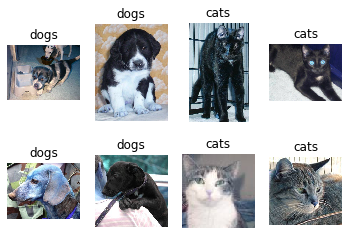

In [9]:
n_img = 8

for i in range(n_img // 2):
    plt.subplot(2, 4, i + 1)
    img, label = train_dataset[random.randint(0, len(train_dataset) - 1)]
    plt.imshow(img, cmap = 'gray')
    plt.title(train_dataset.dataset.classes[label])
    plt.axis('off')

for i in range(n_img // 2):
    plt.subplot(2, 4, n_img // 2 + i + 1)
    img, label = val_dataset[random.randint(0, len(val_dataset) - 1)]
    plt.imshow(img, cmap = 'gray')
    plt.title(val_dataset.dataset.classes[label])
    plt.axis('off')

plt.show()

In [0]:
train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224),
    torchvision.transforms.RandomHorizontalFlip(),
    #torchvision.transforms.RandomRotation(90),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(225),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [0]:
train_dataset = ImageDataset(train_directory, transform=train_transforms)
val_dataset = ImageDataset(val_directory, transform=val_transforms)

In [0]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size = batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = batch_size)

In [0]:
def show_grid(images, labels):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    grid = torchvision.utils.make_grid(images)

    plt.imshow((grid.numpy().transpose((1, 2, 0))) * std + mean)
    plt.title(labels.numpy())
    plt.axis('off')

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


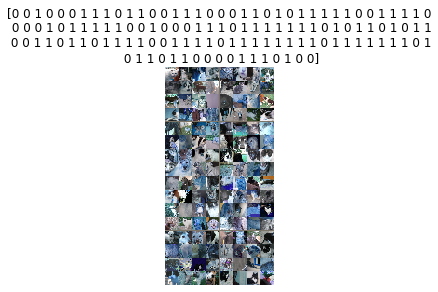

In [14]:
images, labels = next(iter(train_loader))
show_grid(images, labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


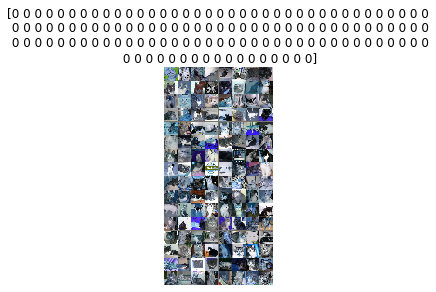

In [15]:
images, labels = next(iter(val_loader))
show_grid(images, labels)

In [16]:
model = torchvision.models.resnet18(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
n_features = model.fc.in_features
model.fc = torch.nn.Linear(n_features, 2)
model = model.to(device)

n_epochs = 10
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [18]:
model.train()

start = time.time()
epoch_losses = []

for epoch in range(n_epochs):
    running_loss = 0

    for i, (images, labels) in enumerate(train_loader):
	    # Send data to the GPU.
        images = images.to(device)
        labels = labels.to(device)

	    # Predicting and backpropagation.
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        
    # Performance statistics.
    temp_epochs_loss = running_loss / len(train_loader)
    epoch_losses.append(temp_epochs_loss)
    print(f'Epoch {epoch + 1}/{n_epochs}: {temp_epochs_loss:.4f}')

time_elapsed = time.time() - start
print(f'Training finished in {time_elapsed // 60:.0f}m {time_elapsed % 60:.4f}s')

Epoch 1/10: 51.1638
Epoch 2/10: 29.9563
Epoch 3/10: 24.4786
Epoch 4/10: 21.6684
Epoch 5/10: 20.1850
Epoch 6/10: 19.1053
Epoch 7/10: 17.8131
Epoch 8/10: 17.2785
Epoch 9/10: 16.9389
Epoch 10/10: 16.4082
Training finished in 29m 17.8045s


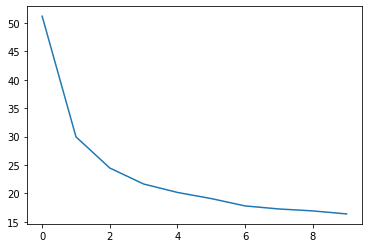

In [19]:
plt.plot(epoch_losses)
plt.show()

In [20]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0

    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        output = model(images)
        _, preds = torch.max(output.data, 1)

        total += labels.size(0)
        correct += (preds == labels).sum().item()

    print(f'Accuracy: {100 * correct / total}%')

Accuracy: 98.0%
